In [1]:
#Skilaverkefni 5 í Stærðfræði og reiknifræði

In [2]:
#Verkefni 18.1) Fallteikning:

def f(x):
    return (x + 3) * (x + 2) * x * (x - 2) * (x - 3)

print(f(1))

24


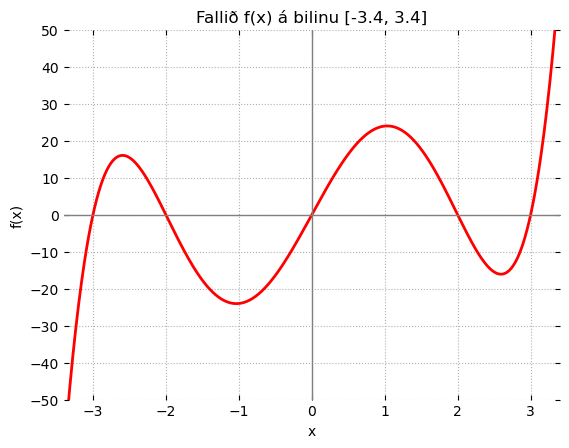

In [2]:
#Verkefni 18.2) Fallteikning:

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Skilgreinum fallið
def f(x):
    return (x + 3) * (x + 2) * x * (x - 2) * (x - 3)

# Búum til jafnt fall af x á bilinu [-3.4, 3.4]
x = np.linspace(-3.4, 3.4, 500)

# Teiknum graf fallið með línubreidd 2 og rauðum lit
plt.plot(x, f(x), linewidth=2, color='red')

# Stillum stikana og hreinsum hnitakerfi
plt.xlim(-3.4, 3.4)
plt.ylim(-50, 50)
plt.xticks(np.arange(-3, 4, 1))
plt.yticks(np.arange(-50, 51, 10))
plt.tick_params(direction='in', top=True, right=True)

# Teiknum lóðréttar og láréttar línur á núllpunktinum með línubreidd 1 og litnum gráum
plt.axvline(0, color='gray', linewidth=1)
plt.axhline(0, color='gray', linewidth=1)

# Bætum línugrind og ramma við myndina
plt.grid(True, linestyle=':')
plt.box(False)

# Setjum titil og lýsingu á ásunum
plt.title("Fallið f(x) á bilinu [-3.4, 3.4]")
plt.xlabel("x")
plt.ylabel("f(x)")

# Sýnum myndina
plt.show()

In [11]:
#Verkefni 19.1) Hiti og úrkoma: 

import numpy as np
file = "https://cs.hi.is/python/hiti-urkoma.txt"
(x,y,z) = np.loadtxt(file,dtype=str).T
ar = x.astype(int)
medalhiti = y.astype(float)
urkoma = z.astype(float)
print(f"Ár        Meðalárshiti      Úrkoma")
for i in range(0,5):
    print(f"{ar[i]:<13} {medalhiti[i]:<13} {urkoma[i]}")
for i in range(-5,0):
    print(f"{ar[i]:<13} {medalhiti[i]:<13} {urkoma[i]}")


Ár        Meðalárshiti      Úrkoma
1949          3.2           565.5
1950          4.0           535.5
1951          3.4           460.6
1952          3.6           495.7
1953          4.4           979.0
2014          5.3           678.8
2015          4.1           804.4
2016          5.5           806.2
2017          4.9           678.6
2018          4.5           875.3


In [41]:
#Verkefni 19.2) Hiti og úrkoma: 

import numpy as np

# Load the data from the file
file = "https://cs.hi.is/python/hiti-urkoma.txt"
(x, y, z) = np.loadtxt(file, dtype=str).T
ar = x.astype(int)
medalhiti = y.astype(float)
urkoma = z.astype(float)

# Find the average temperature
average_temp = np.mean(medalhiti)
print(f"Meðalhitastig: {average_temp:.2f}°C")

# Find the coldest year and its average temperature
coldest_year = ar[np.argmin(medalhiti)]
coldest_temp = np.min(medalhiti)
print(f"Kaldasta árið var: {coldest_year}, með meðalhitastigið: {coldest_temp:.2f}°C")

# Find the number of years with an average temperature under 3°C
cold_years = [y for y in medalhiti if y < 3]
num_cold_years = len(cold_years)
print(f"Það voru {num_cold_years} ár með meðalhitastig undir 3°C")



Meðalhitastig: 3.96°C
Kaldasta árið var: 1979, með meðalhitastigið: 2.30°C
Það voru 4 ár með meðalhitastig undir 3°C


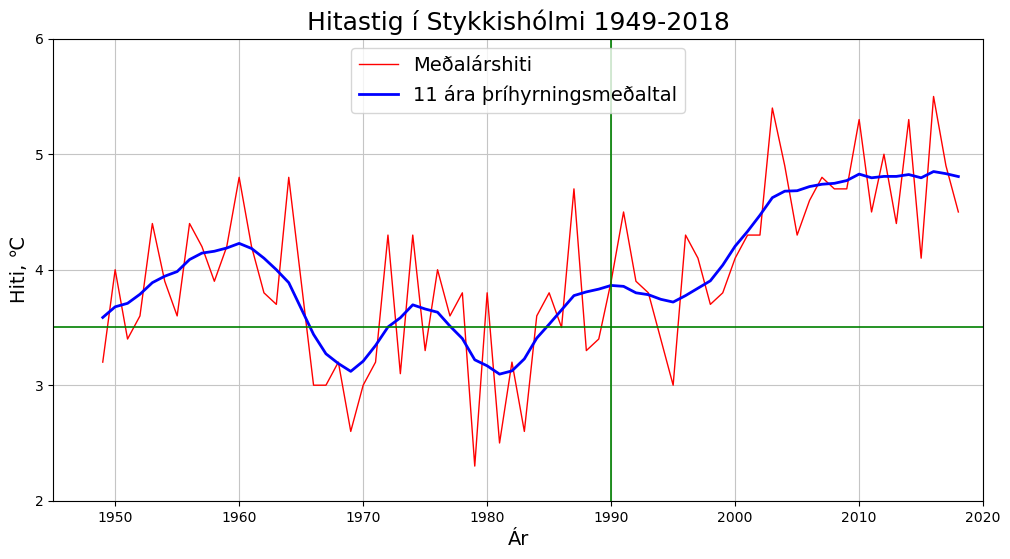

In [51]:
#Verkefni 19.3) Hiti og úrkoma: 

import numpy as np
import matplotlib.pyplot as plt


file = "https://cs.hi.is/python/hiti-urkoma.txt"
(x, y, z) = np.loadtxt(file, dtype=str).T
ar = x.astype(int)
medalhiti = y.astype(float)

def running_mean(x, d=5):
    n = len(x)
    rm = [0] * n
    for i in range(n):
        m = max(0, i - d)
        M = min(n, i + d + 1)
        w = [d - abs(k - i) for k in range(m, M)]
        rm[i] = sum([x[m+j] * w[j] for j in range(M - m)]) / sum(w)
    return rm

avg = running_mean(medalhiti, 5)
plt.figure(figsize=(12, 6))
plt.xlim([1945, 2020])
plt.ylim([2, 6])
plt.xticks(np.arange(1950, 2021, 10))
plt.yticks(np.arange(2, 7))
plt.plot(ar, medalhiti, label="Meðalárshiti", lw=1, c="r")
plt.plot(ar, avg, label="11 ára þríhyrningsmeðaltal", lw=2, c="b")
plt.axvline(1990, c="g", lw=1.2)
plt.axhline(3.5, c="g", lw=1.2)
plt.grid(True, c="#C5C5C5")
plt.title("Hitastig í Stykkishólmi 1949-2018", fontsize="18")
plt.xlabel("Ár", fontsize="14")
plt.ylabel("Hiti, ℃", fontsize="14")
plt.legend(loc="upper center", fontsize="14")
plt.show()


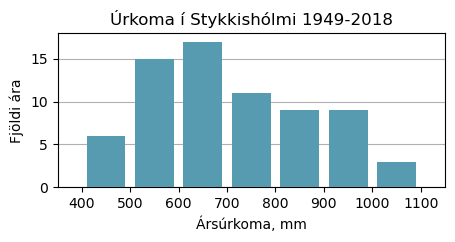

In [56]:
#Verkefni 19.4) Hiti og úrkoma:

import matplotlib.pyplot as plt
import numpy as np

file = "https://cs.hi.is/python/hiti-urkoma.txt"
data = np.loadtxt(file, dtype=str).T
year = data[0].astype(int)
rainfall = data[2].astype(float)

plt.figure(figsize=(5,2))
plt.xlim([350, 1150])
plt.ylim([0,18])
y=[x for x in rainfall]
plt.grid(True, axis='y')
plt.hist(y, bins=7, range=(400,1100), rwidth=0.8, color='#579BB1', zorder=3)
plt.xlabel('Ársúrkoma, mm')
plt.ylabel('Fjöldi ára')
plt.title('Úrkoma í Stykkishólmi 1949-2018')
plt.show()

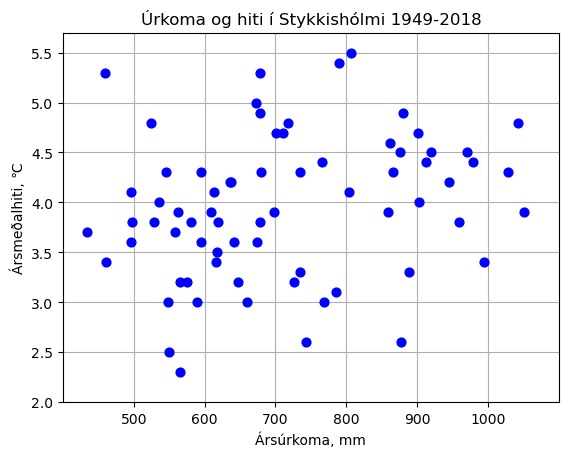

In [57]:
#Verkefni 19.5) Hiti og úrkoma:


import matplotlib.pyplot as plt
import numpy as np

file = "https://cs.hi.is/python/hiti-urkoma.txt"
data = np.loadtxt(file, dtype=str).T
year = data[0].astype(int)
avg = data[1].astype(float)
rainfall = data[2].astype(float)

plt.grid(True)
plt.xlim(400,1100)
plt.ylim(2,5.7)
plt.xticks(np.arange(500,1001, 100))
plt.xlabel('Ársúrkoma, mm')
plt.ylabel('Ársmeðalhiti, ℃')
plt.title("Úrkoma og hiti í Stykkishólmi 1949-2018")
plt.scatter(rainfall, avg, s=40, c="b", zorder=3)
plt.show()

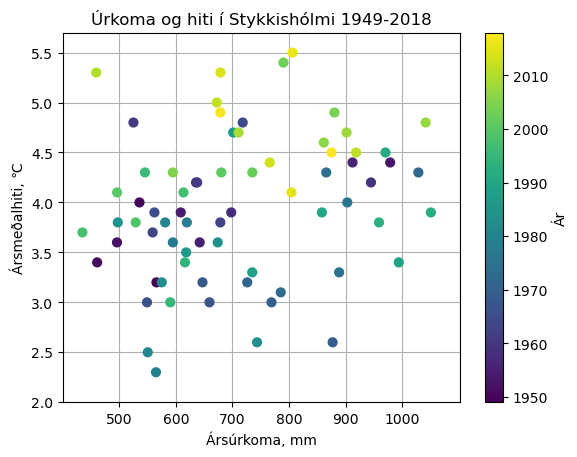

In [58]:
#Verkefni 19.6) Hiti og úrkoma:

plt.grid(True)
plt.xlim(400,1102)
plt.ylim(2,5.7)
plt.xticks(np.arange(500,1001, 100))
plt.xlabel('Ársúrkoma, mm')
plt.ylabel('Ársmeðalhiti, ℃')
plt.scatter(rainfall, avg, c=year, s=40, zorder=3)
plt.colorbar(label="Ár")
plt.title("Úrkoma og hiti í Stykkishólmi 1949-2018")
plt.show()

In [ ]:
Mynd 1)

Tvær línur með Meðalárshiti fyrir hvert ár. Það er meðahitastig hefur hækkað mikið frá 
1980 og er nú rétt yfir 4 gráðum celcius

Mynd  2)

Fjöldi ára með úrkomu milli 400mm-1000mm, var oftast á milli 600mm og 700mm 


Mynd 3)

Grafið sýnir punkta með ársúrkomu í tengslum við meðalhita, meðalhitinn var oftast 3.7 gráður celcius. 


Mynd nr. 4

Sýnir hvernig meðalhiti og úrkoma yfir ár hefur breyst á milli 1949 til 2018. Meðalhiti lækkar á milli 1990-2010 en úrkoma versnar. 
